In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from keras.optimizers import Adam 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers.schedules import ExponentialDecay 
import cv2 
import numpy as np
import os
import shutil
from glob import glob
from sklearn.metrics import f1_score

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_data_gen.flow_from_directory(
    'db_for_cnn_2/train',
    target_size=(224,224),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)


Found 211500 images belonging to 2 classes.


In [4]:
class_names = train_generator.class_indices

In [5]:
images, labels = next(train_generator)

In [6]:
class_indices =train_generator.class_indices
indices_to_class = {v: k for k,v in class_indices.items()}
label_names = [indices_to_class[np.argmax(label)] for label in labels]

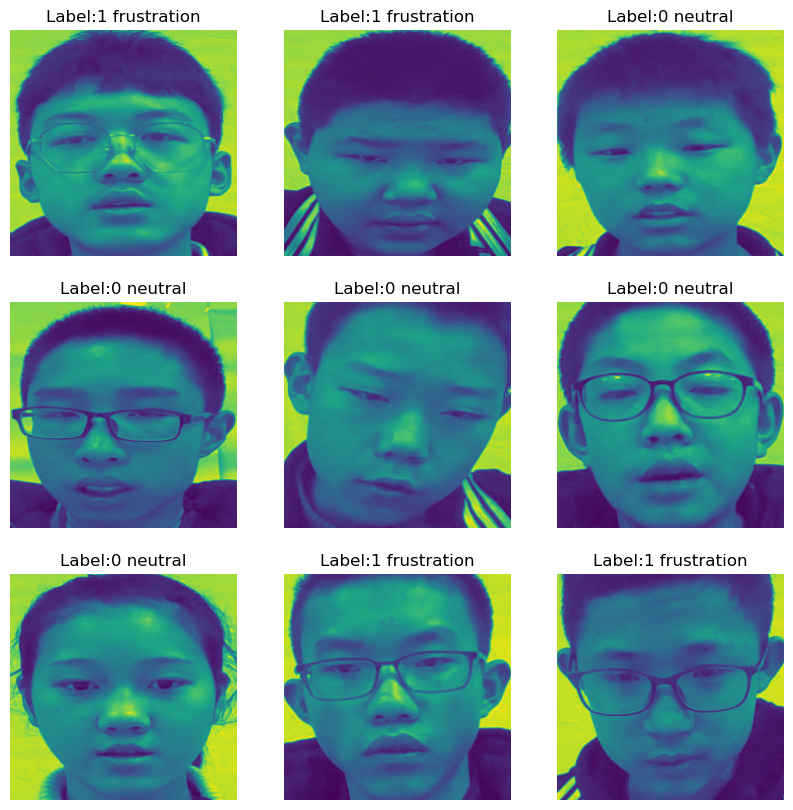

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(f'Label:{label_names[i]}')
    plt.axis('off')
plt.show()

In [8]:
validation_generator = validation_data_gen.flow_from_directory(
    'db_for_cnn_2/dev',
    target_size=(224,224),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 39780 images belonging to 2 classes.


In [9]:
test_generator = test_data_gen.flow_from_directory(
    'db_for_cnn_2/test',
    target_size=(224,224),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 39840 images belonging to 2 classes.


In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(2,activation="softmax"))

In [20]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 average_pooling2d_6 (Averag  (None, 54, 54, 32)       0         
 ePooling2D)                                                     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 27, 27, 32)       0         
 g2D)                                                            
                                                      

In [21]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [23]:
history = model.fit_generator( 
        train_generator, 
        steps_per_epoch=28709 // 64, 
        epochs=10, 
        validation_data=validation_generator, 
        validation_steps=7178 // 64)

C:\Users\bl4ck\AppData\Local\Temp\ipykernel_16272\2726110189.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
448/448 [==============================] - 289s 644ms/step - loss: 0.3847 - accuracy: 0.8311 - val_loss: 0.3590 - val_accuracy: 0.8375
Epoch 2/10
448/448 [==============================] - 269s 600ms/step - loss: 0.3592 - accuracy: 0.8446 - val_loss: 0.3484 - val_accuracy: 0.8449
Epoch 3/10
448/448 [==============================] - 282s 630ms/step - loss: 0.3504 - accuracy: 0.8509 - val_loss: 0.3546 - val_accuracy: 0.8440
Epoch 4/10
448/448 [==============================] - 282s 629ms/step - loss: 0.3335 - accuracy: 0.8587 - val_loss: 0.2743 - val_accuracy: 0.8763
Epoch 5/10
448/448 [==============================] - 278s 620ms/step - loss: 0.3228 - accuracy: 0.8619 - val_loss: 0.2979 - val_accuracy: 0.8662
Epoch 6/10
448/448 [==============================] - 276s 616ms/step - loss: 0.3146 - accuracy: 0.8655 - val_loss: 0.2958 - val_accuracy: 0.8670
Epoch 7/10
448/448 [==============================] - 257s 573ms/step - loss: 0.3079 - accuracy: 0.8725 - val_loss: 0.2872 -

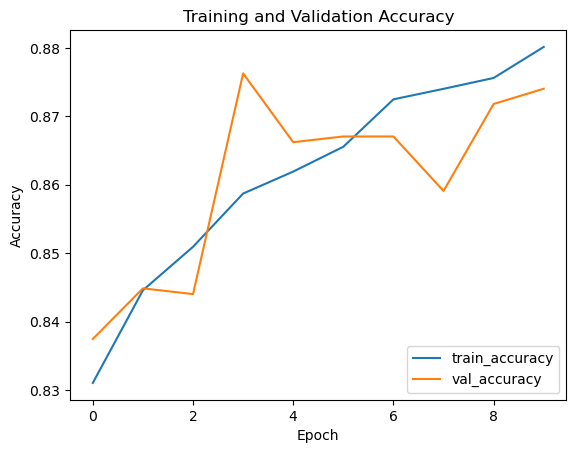

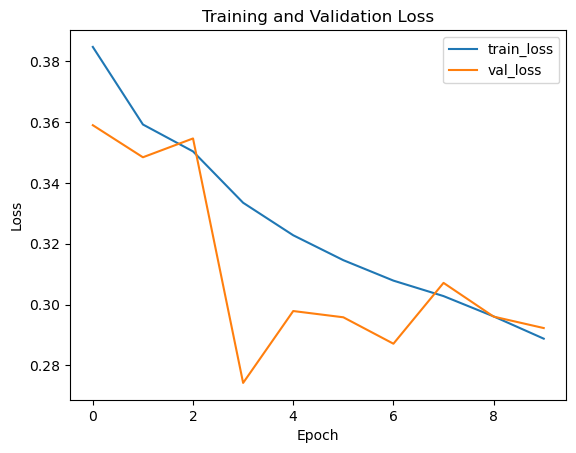

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
model.save('cnn-3.h5')

In [26]:
test_pred_path = 'db_for_cnn_2/test/1 frustration/11_6_3-12-23.jpg'
image = cv2.imread(test_pred_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
image_normalized = image / 255.0
image_batch = np.expand_dims(image_normalized, axis=0)

In [27]:
image_normalized.shape

(224, 224)

In [28]:
import tensorflow as tf

In [33]:
model = tf.keras.models.load_model('cnn-1.h5')

In [29]:
predictions = model.predict(image_batch)

1/1 [==============================] - 1s 634ms/step


In [30]:
predicted_class = np.argmax(predictions, axis=1)

In [31]:
print('Clase predicha:', predicted_class)

Clase predicha: [1]


In [59]:
predictions = model.predict(test_generator)

623/623 [==============================] - 45s 73ms/step


In [60]:
predicted_labels = np.argmax(predictions, axis=1)

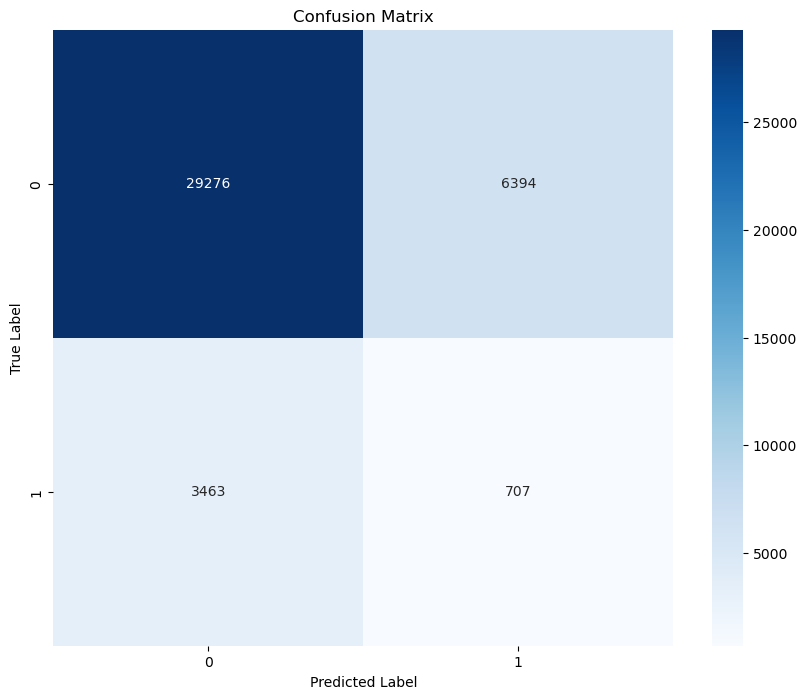

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
conf_matrix = confusion_matrix(a, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(2), yticklabels=np.arange(2))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [65]:
a = test_generator.labels.astype('int64')

In [148]:
a

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [143]:
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
predicted_labels = (predictions > 0.5).astype(int).flatten()